In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\zulfa\AppData\Local\Temp\ipykernel_13440\1985940623.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
data_dir = 'data'
img_ext = ['jpg', 'png', 'bmp', 'jpeg']

In [3]:
if imghdr.what('data/harimau/0983cfec-60ec-4818-85c2-1c3f62319537_169.jpeg') not in img_ext:
    print("salah")
else:
    print("benar")

benar


## sortir image

In [4]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            type_ext = imghdr.what(image_path)
            if type_ext not in img_ext:
                print(f"Image not in extension list {image_path}")
                os.remove(image_path)
        except Exception as e:
            print(f"issue with image {image_path}")
            

## 3. Load data

In [5]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 822 files belonging to 2 classes.


In [6]:
data_iterator = data.as_numpy_iterator()

In [7]:
data_iterator

In [8]:
batch = data_iterator.next()

In [9]:
# default batch size so the batch 
len(batch[1])

32

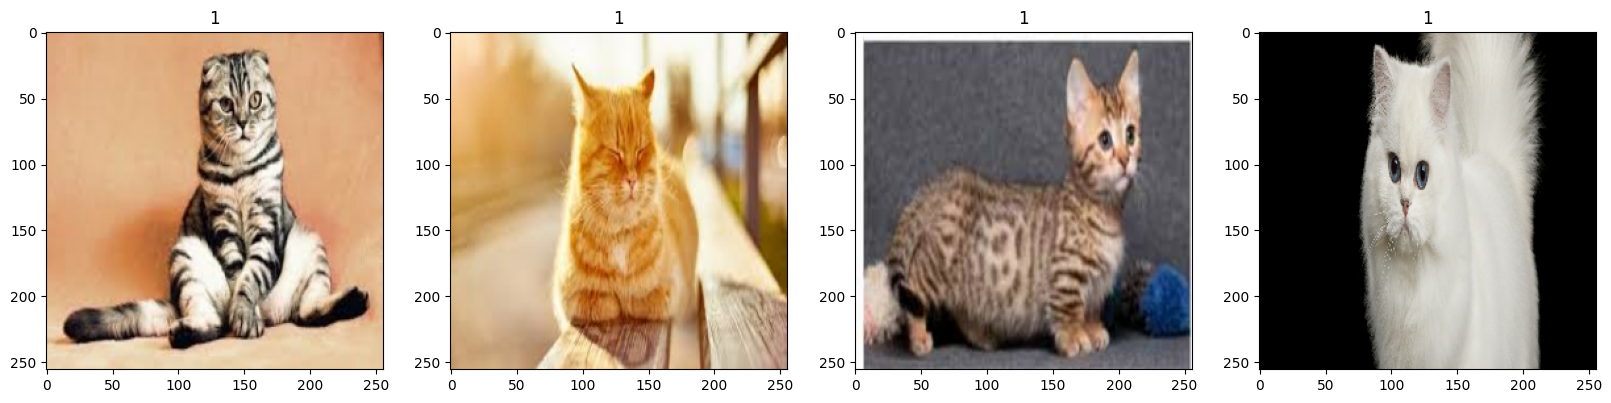

In [10]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 4. Scale Data

In [11]:
data = data.map(lambda x, y: (x/255, y))

In [12]:
data.as_numpy_iterator().next()

(array([[[[6.33241415e-01, 5.11672795e-01, 4.01868880e-01],
          [4.84252453e-01, 3.62683833e-01, 2.52879888e-01],
          [4.59895819e-01, 3.38327199e-01, 2.28523284e-01],
          ...,
          [8.44822288e-01, 7.66390920e-01, 6.36979163e-01],
          [8.43137264e-01, 7.55974293e-01, 6.29473031e-01],
          [8.32383573e-01, 7.42187500e-01, 6.16697311e-01]],
 
         [[6.29457235e-01, 5.07888615e-01, 3.98084700e-01],
          [5.56418955e-01, 4.34850365e-01, 3.25046420e-01],
          [5.74133515e-01, 4.52564925e-01, 3.42760980e-01],
          ...,
          [7.28685081e-01, 6.51069939e-01, 5.21658123e-01],
          [7.22548068e-01, 6.35385096e-01, 5.08883834e-01],
          [7.14287519e-01, 6.24091387e-01, 4.98601228e-01]],
 
         [[6.24550045e-01, 5.02981365e-01, 3.93177480e-01],
          [6.49462402e-01, 5.27893782e-01, 4.18089867e-01],
          [7.21031547e-01, 5.99462867e-01, 4.89658982e-01],
          ...,
          [6.02931142e-01, 5.26499331e-01, 3.9708

In [13]:
(len(data))

26

## 5. Split Data

In [14]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [15]:
train_size, val_size, test_size

(18, 5, 2)

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## 6.Build model

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (3,3), 1, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, (3,3), 1, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## 7. Train

In [19]:
logdir='logs'

In [20]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [21]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=tensorboard_callback)

Epoch 1/20


18/18 [==============================] - 21s 986ms/step - loss: 0.9322 - accuracy: 0.4948 - val_loss: 0.6547 - val_accuracy: 0.5875
Epoch 2/20
18/18 [==============================] - 17s 889ms/step - loss: 0.6207 - accuracy: 0.6181 - val_loss: 0.5880 - val_accuracy: 0.6062
Epoch 3/20
18/18 [==============================] - 24s 1s/step - loss: 0.5862 - accuracy: 0.6042 - val_loss: 0.5706 - val_accuracy: 0.6500
Epoch 4/20
18/18 [==============================] - 20s 1s/step - loss: 0.5139 - accuracy: 0.7031 - val_loss: 0.3879 - val_accuracy: 0.8625
Epoch 5/20
18/18 [==============================] - 16s 840ms/step - loss: 0.4284 - accuracy: 0.8212 - val_loss: 0.3492 - val_accuracy: 0.8813
Epoch 6/20
18/18 [==============================] - 16s 853ms/step - loss: 0.3542 - accuracy: 0.8576 - val_loss: 0.4889 - val_accuracy: 0.7500
Epoch 7/20
18/18 [==============================] - 15s 810ms/step - loss: 0.4082 - accuracy: 0.8229 - val_loss: 0.3336 - val_accuracy: 0.8625
Epoch 8/20
18/18

## 8. Plot Performance

<function matplotlib.pyplot.show(close=None, block=None)>

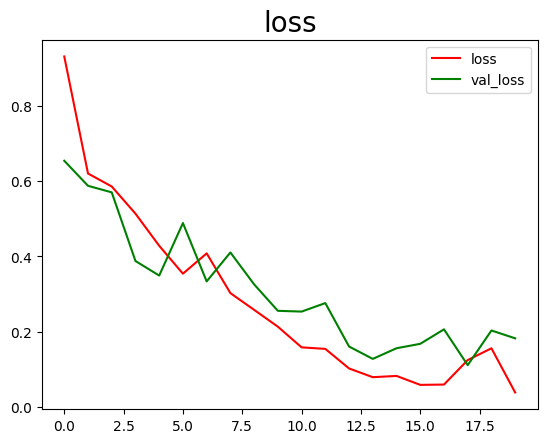

In [22]:
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='green', label='val_loss')
plt.title('loss', fontdict={'fontsize': 20})
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

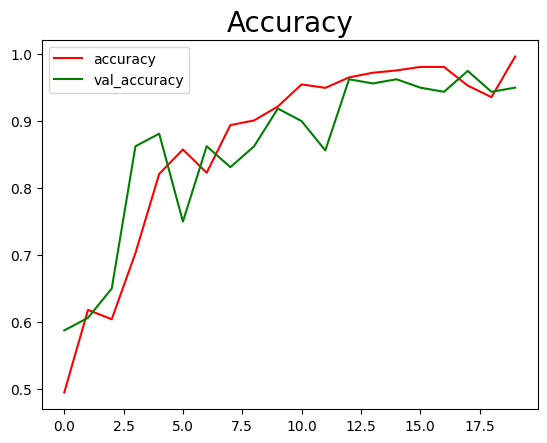

In [23]:
plt.plot(hist.history['accuracy'], color='red', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='green', label='val_accuracy')
plt.title('Accuracy', fontdict={'fontsize': 20})
plt.legend()
plt.show

In [24]:
pre = tf.keras.metrics.Precision()
re = tf.keras.metrics.Recall()
acc = tf.keras.metrics.BinaryAccuracy()

In [25]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 155ms/step


In [26]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9444444, shape=(), dtype=float32) tf.Tensor(0.9444444, shape=(), dtype=float32) tf.Tensor(0.96875, shape=(), dtype=float32)


## 10. Test

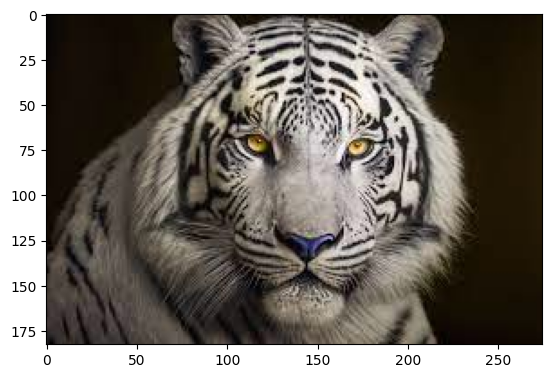

In [27]:
img = cv2.imread('tigerTes3.jpg')
plt.imshow(img)
plt.show()

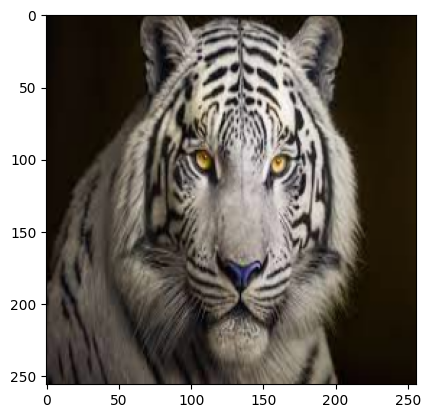

In [28]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [29]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[ 8.        ,  6.        ,  5.        ],
        [ 8.111328  ,  6.111328  ,  5.111328  ],
        [ 9.185547  ,  7.185547  ,  6.185547  ],
        ...,
        [26.44336   , 19.072266  ,  5.        ],
        [27.        , 20.        ,  3.2226562 ],
        [27.        , 20.        ,  3.        ]],

       [[ 8.        ,  6.        ,  5.        ],
        [ 8.111328  ,  6.111328  ,  5.111328  ],
        [ 9.185547  ,  7.185547  ,  6.185547  ],
        ...,
        [26.44336   , 19.072266  ,  5.        ],
        [27.        , 20.        ,  3.2226562 ],
        [27.        , 20.        ,  3.        ]],

       [[ 8.        ,  6.        ,  5.        ],
        [ 8.111328  ,  6.111328  ,  5.111328  ],
        [ 9.185547  ,  7.185547  ,  6.185547  ],
        ...,
        [26.44336   , 19.125538  ,  4.8934555 ],
        [27.        , 20.        ,  3.2226562 ],
        [27.        , 20.        ,  3.        ]],

       ...,

     

In [30]:
pred = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 100ms/step


In [31]:
pred

array([[0.01276081]], dtype=float32)

In [32]:
if pred > 0.5:
    print("That's cat")
else:
    print("That's Tiger")

That's Tiger


In [33]:
def prediction(fileImage, model):
    img = cv2.imread(fileImage)
    resize = tf.image.resize(img, (256,256))
    pred = model.predict(np.expand_dims(resize/255, 0))
    resize = tf.image.resize(img, (256,256))
    plt.imshow(resize.numpy().astype(int))
    plt.show()
    if pred > 0.5:
        print("That's a cat")
    else: 
        print("That's a tiger")

1/1 [==============================] - 0s 37ms/step


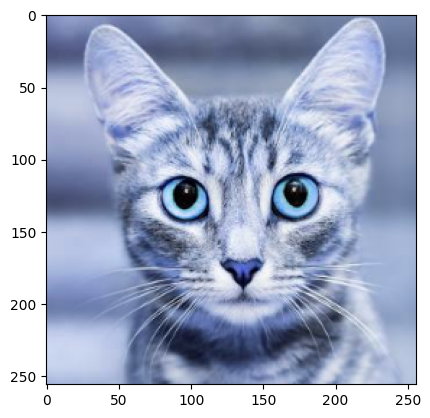

That's a cat


In [34]:
prediction('kucingTest.jpg', model)

1/1 [==============================] - 0s 30ms/step


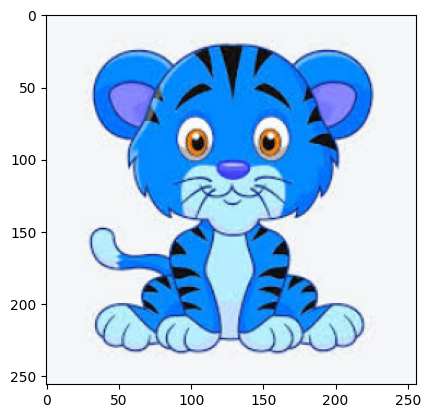

That's a cat


In [35]:
prediction('tigerTes.jpg', model)

1/1 [==============================] - 0s 36ms/step


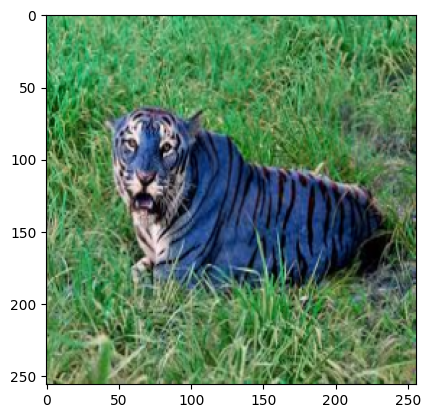

That's a tiger


In [36]:
prediction('tigerTes2.jpg', model)

1/1 [==============================] - 0s 31ms/step


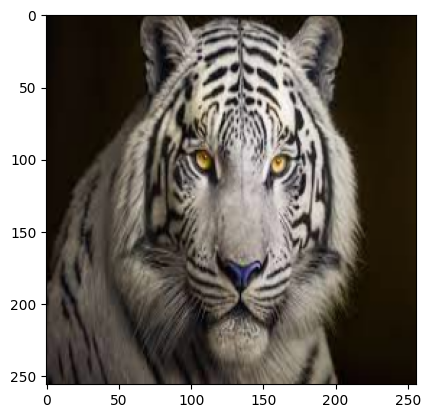

That's a tiger


In [37]:
prediction('tigerTes3.jpg', model)

1/1 [==============================] - 0s 35ms/step


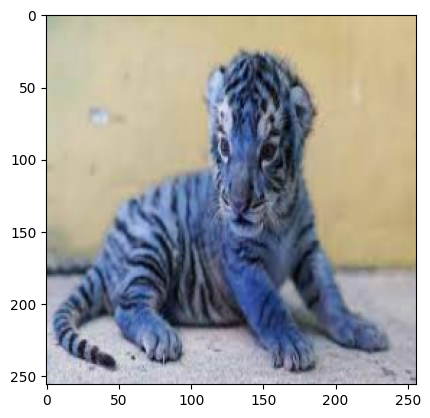

That's a cat


In [38]:
prediction('tigerTes4.jpg', model)

## 11. Save the model

In [39]:
model.save(os.path.join('model', 'imageClassifier.h5'))

c:\Users\zulfa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
loadModel = tf.keras.models.load_model('model/imageClassifier.h5')

1/1 [==============================] - 0s 111ms/step


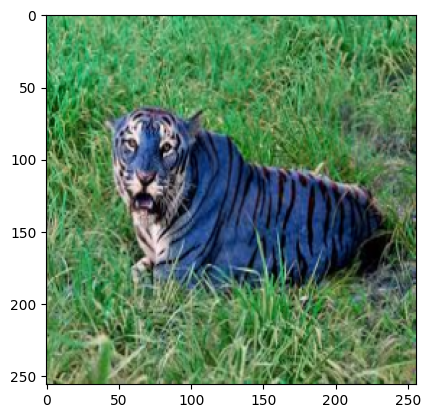

That's a tiger


In [41]:
prediction('tigerTes2.jpg', loadModel)